My approach was to look for patterns and differences among:
(1) genres -- i.e., the most popular contrasting genres - Action and Comedy
(2) hits and misses -- i.e., movies that earned above average and below average at the global boxoffice
(3) hits and misses for a single genre -- in this case, I looked at Action movies ONLY and tried to see if there were diferences in the text patterns of hit/miss movies

##This file looks at ACTION VS COMEDY GENRES -- are there text differences?

In [1]:
import os

In [2]:
os.getcwd()

'/Users/martinkihn/Desktop/Scrapy nltk'

In [3]:
os.chdir('/Users/martinkihn/Desktop')

In [4]:
os.getcwd()

'/Users/martinkihn/Desktop'

In [5]:
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
additional_stopwords = ['york', 'redhaired', 'jackson', 'redneck', 
                       'chang', 'philip', 'borat', 'nai', 'collin', 
                       'carol', 'zakarweski', 'jay', 'bob', 'lara',
                       'jean', 'peter', 'warner', 'bros', 'mr', 'le',
                        'crowley', 'heelshire', 'john', 'mike', 'texas',
                       'martin', 'sr', 'toby', 'midland', 'standard',
                       'dolio', 'hideko', 'llorona', 'jack', 'ig', 'de',
                        'la', 'salle', 'ii', 'wooden', 'tremaine', 'riding',
                        'acre', 'robert', 'downey', 'jr', 'janets', 'potts',
                       'gwyneth', 'paltrow', 'nala', 'stone', 'king', 'genie',
                        'thanos', '21']
import matplotlib.pyplot as plt

In [6]:
def basic_clean(text):
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + additional_stopwords
    text = (unicodedata.normalize('NFKD', text)
           .encode('ascii', 'ignore')
           .decode('utf-8', 'ignore')
           .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [7]:
with open('spoiler_text_files/action.txt', 'r') as file:
    action_words = file.read()

In [8]:
with open('spoiler_text_files/comedy.txt', 'r') as file:
    comedy_words = file.read()

In [9]:
action_words = basic_clean(action_words)

In [10]:
comedy_words = basic_clean(comedy_words)

In [11]:
import pandas as pd

In [12]:
from nltk import FreqDist

In [27]:
action_fdist = FreqDist(action_words)

In [28]:
comedy_fdist = FreqDist(comedy_words)

# Looking at unigrams here

In [29]:
action_fdist.most_common(10)

[('get', 2686),
 ('go', 2352),
 ('find', 1767),
 ('tell', 1669),
 ('back', 1573),
 ('take', 1558),
 ('see', 1311),
 ('one', 1272),
 ('try', 1206),
 ('say', 996)]

In [30]:
comedy_fdist.most_common(10)

[('go', 1838),
 ('get', 1749),
 ('tell', 1423),
 ('say', 965),
 ('see', 934),
 ('back', 892),
 ('find', 871),
 ('take', 841),
 ('try', 754),
 ('make', 706)]

# Now I wanted to look at frequencies - because the Action and Comedy corpus were different lengths - so created a dataframe with words and frequencies by genres

In [164]:
df_action_fdist = pd.DataFrame.from_dict(action_fdist, orient="index")

In [165]:
df_comedy_fdist = pd.DataFrame.from_dict(comedy_fdist, orient="index")

In [166]:
df_action_fdist.columns = ['Action_Frequency']
df_comedy_fdist.columns = ['Comedy_Frequency']

In [167]:
df_action_fdist['Term'] = df_action_fdist.index
df_comedy_fdist['Term'] = df_comedy_fdist.index

In [168]:
merged_fdist = pd.merge(df_action_fdist, df_comedy_fdist, 
                        on=['Term'])

In [169]:
merged_fdist.head()

,Action_Frequency,Term,Comedy_Frequency
0,123,film,168
1,301,open,140
2,672,man,282
3,400,named,261
4,236,david,85


In [170]:
#switch columns for readability
cols = list(merged_fdist.columns)
a, b = cols.index('Term'), cols.index('Action_Frequency')
cols[b], cols[a] = cols[a], cols[b]
merged_fdist = merged_fdist[cols]

In [171]:
merged_fdist.head()

,Term,Action_Frequency,Comedy_Frequency
0,film,123,168
1,open,301,140
2,man,672,282
3,named,400,261
4,david,236,85


In [102]:
new_dist.head() ##made a percent version of above

,Term,Action_Pct,Comedy_Pct
0,film,0.053452,0.109972
1,open,0.130804,0.091643
2,man,0.292028,0.184596
3,named,0.173826,0.170850
4,david,0.102557,0.055641


In [122]:
new_dist = new_dist.sort_values('Action_Pct', ascending = False)

In [175]:
new_dist.set_index("Term", drop=True, inplace=True) #this is now to 20 terms

In [178]:
new_dist.head()

,Action_Pct,Comedy_Pct
Term,,
get,1.167242,1.144888
go,1.022098,1.203147
find,0.767877,0.570153
tell,0.725290,0.931490
back,0.683571,0.583900


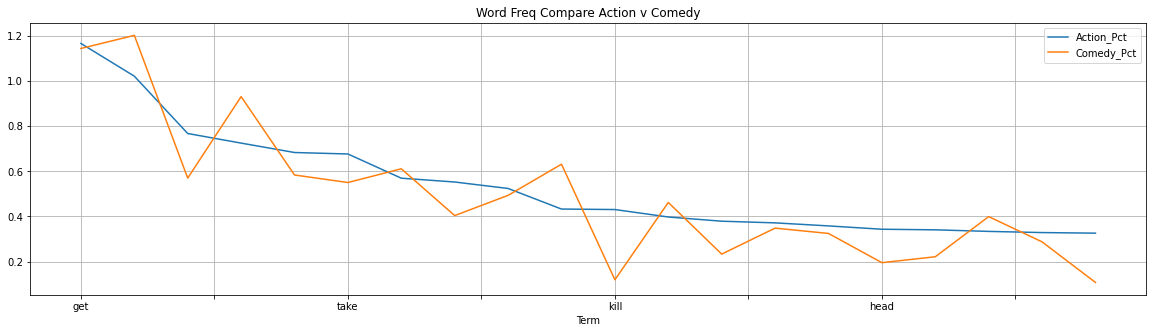

In [181]:
new_dist.plot(title='Word Freq Compare Action v Comedy', 
             grid = True)

In [189]:
new_dist.reset_index(level=0, inplace=True)

In [192]:
new_dist.head()

,Term,Action_Pct,Comedy_Pct
0,get,1.167242,1.144888
1,go,1.022098,1.203147
2,find,0.767877,0.570153
3,tell,0.725290,0.931490
4,back,0.683571,0.583900


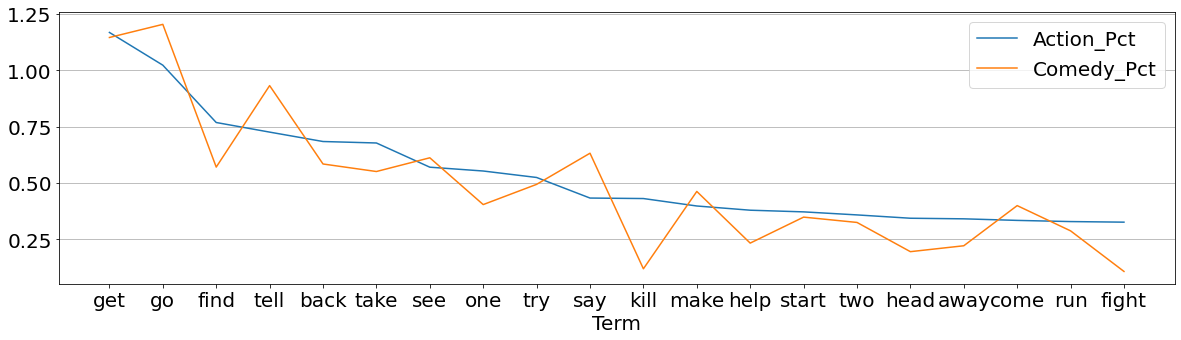

In [205]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots()
plt.xticks(new_dist.index)
new_dist.plot(x = 'Term', y = 'Action_Pct', ax=ax)
new_dist.plot(x = 'Term', y = 'Comedy_Pct', ax=ax)
ax.grid(axis='y')

# Now I look at n-grams - for 'action_words', 'comedy_words'

In [208]:
action_tri = (pd.Series(nltk.ngrams(action_words, 3)).value_counts())[:20]

In [209]:
comedy_tri = (pd.Series(nltk.ngrams(comedy_words, 3)).value_counts())[:20]

In [ ]:
## plot trigrams and compare

In [210]:
action_tri = action_tri[:12]
comedy_tri = comedy_tri[:12]

Text(0.5, 0, '# of Occurrences')

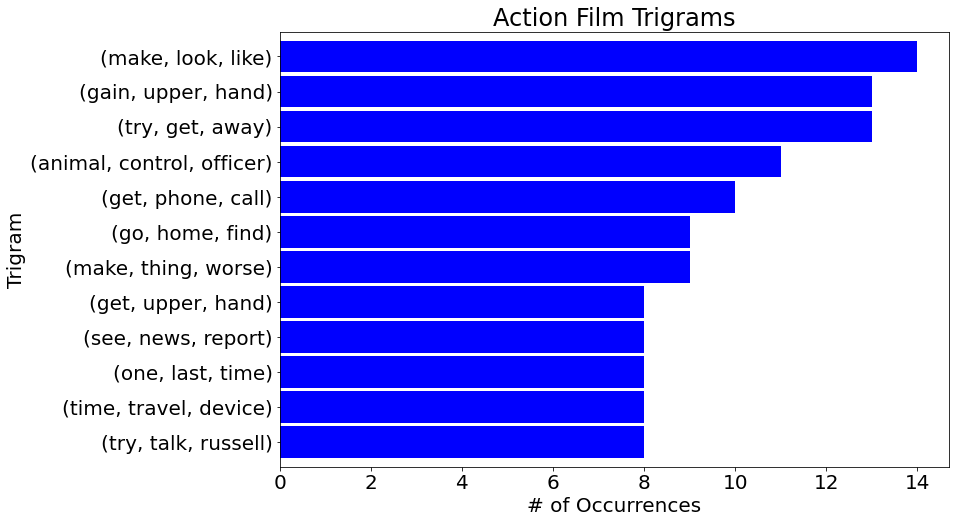

In [211]:
action_tri.sort_values().plot.barh(color='blue',
                                width=.9, figsize=(12,8))
plt.title('Action Film Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurrences')

Text(0.5, 0, '# of Occurrences')

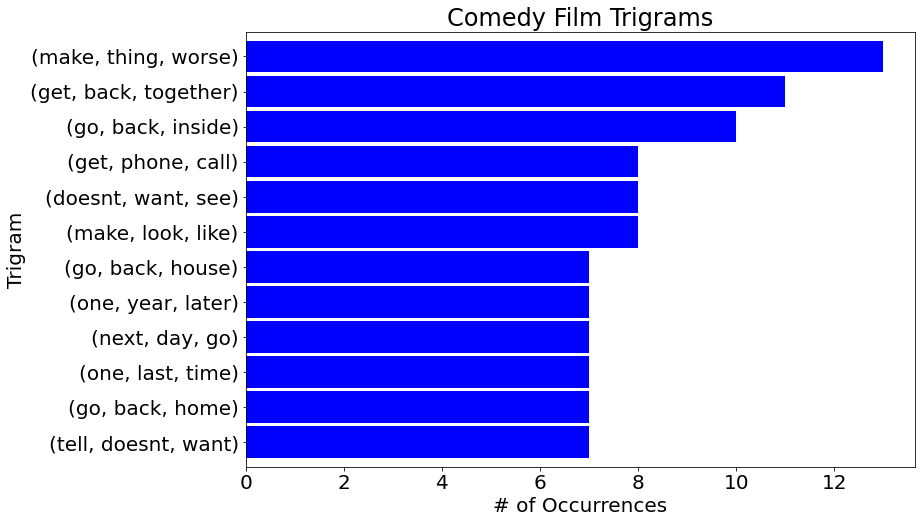

In [212]:
comedy_tri.sort_values().plot.barh(color='blue',
                                width=.9, figsize=(12,8))
plt.title('Comedy Film Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurrences')

# Looking at context and similar word context for common words

In [213]:
action_str = ' '.join(action_words)
comedy_str = ' '.join(comedy_words)

In [214]:
#tokensize the strings
action_tokens = nltk.word_tokenize(action_str)
comedy_tokens = nltk.word_tokenize(comedy_str)

In [215]:
#convert to text object for nltk
action_text = nltk.Text(action_tokens)
comedy_text = nltk.Text(comedy_tokens)

In [231]:
#this finds words that share common context
action_text.similar('get')

go take run come head find drive fight tell see pull stop give want
hold keep getting turn walk catch


In [232]:
comedy_text.similar('get')

go take come find back talk make getting tell meet see run help show
leave walk bring love break use


In [241]:
action_text.similar('say')

tell get know asks think shoot come take want help walking like work
give go trying home doesnt call see


In [242]:
comedy_text.similar('say')

tell see go doesnt talk since find call asks love think want realizes
back explains got arrives later admits together


In [243]:
## end of action v comedy